In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
import ot
import os
import warnings
import sys
import sinkhorn_barycenters as sink

In [27]:
#Loading 2 sample images
noise15 = np.load("./artificial_data.npy")[15,:,:]
no_noise15 = np.load("./artificial_data_no_noise.npy")[15, :, :]
noise95 = np.load("./artificial_data.npy")[95, :, :]
no_noise95 = np.load("./artificial_data_no_noise.npy")[95, :, :]

In [58]:
print(noise15[1])
print(noise15[None][0])



M = ot.dist(xs, xt) #put the grids here


[-0.1537228  -0.19046196 -0.07058279  0.00459602 -0.09262453 -0.0399939
 -0.02557239 -0.18479969  0.09125774  0.13711752  0.05558597 -0.26037473
 -0.09450923  0.18993534 -0.1524187  -0.01704818  0.03245421  0.08504807
  0.06348648 -0.10654012  0.07513951 -0.05027053 -0.0192193   0.08697687
  0.04818466 -0.04589985  0.04988493  0.02595571  0.0773207  -0.11607708
 -0.05068221  0.02446596 -0.06930166  0.00218947  0.15851625 -0.07211107
  0.04034131 -0.04748999 -0.25407937  0.09163297  0.00971503 -0.05102944
 -0.18511994  0.01369078  0.14280585 -0.20536689 -0.05181198 -0.02763981
 -0.01217577 -0.06475693]
[[-0.06597286 -0.18719022 -0.14802059 ...  0.11867793 -0.06617233
   0.06192485]
 [-0.1537228  -0.19046196 -0.07058279 ... -0.02763981 -0.01217577
  -0.06475693]
 [ 0.10717108 -0.06557767  0.22272661 ...  0.02575125  0.07042716
   0.09559024]
 ...
 [-0.06583938  0.03333536 -0.03993239 ... -0.09342398 -0.24410365
  -0.00476454]
 [ 0.00981288 -0.12106555 -0.05178643 ...  0.0549976   0.01678

In [3]:
#constants
width = 50
epsilon = 1e-1

noise = np.array([noise15,noise95])
nonoise = np.array([no_noise15, no_noise95])

In [41]:
P = torch.from_numpy(noise)
grid = torch.arange(width).type(torch.float64)
grid /= width
M = ot.dist(noise[0], noise[1]) #M is distance between grid and grid (because it's a 50x50 grid might need to be 1D instead of 2D)
#normalize
M /= M.max()


#P - is where I put the noise matrices\
#M - is the distance 

print(M)
M = (grid[:, None] - grid[None, :]) ** 2
print(M)

[[0.90388004 1.14769391 0.92001152 ... 1.15717088 1.44065616 1.31661566]
 [1.10106113 0.89334709 1.02342077 ... 0.93984038 1.38095202 1.23473049]
 [0.99243283 1.34955765 0.83840084 ... 0.98270373 1.22898295 0.99364205]
 ...
 [1.00382049 1.05752133 1.12435836 ... 0.94890113 1.34011144 1.35168368]
 [0.98591917 1.07932119 0.76471322 ... 0.87422908 1.05442285 0.86040392]
 [0.76060071 0.89124104 0.73009265 ... 0.79286673 0.97829076 0.83068787]]
[[0.00424469 0.00538965 0.00432044 ... 0.00543416 0.00676542 0.00618292]
 [0.00517066 0.00419522 0.00480606 ... 0.00441356 0.00648505 0.00579838]
 [0.00466054 0.00633762 0.00393719 ... 0.00461485 0.00577139 0.00466621]
 ...
 [0.00471401 0.0049662  0.00528007 ... 0.00445611 0.00629326 0.0063476 ]
 [0.00462995 0.00506857 0.00359115 ... 0.00410544 0.00495165 0.00404052]
 [0.00357184 0.00418533 0.00342857 ... 0.00372336 0.00459412 0.00390097]]
tensor([[0.0000e+00, 4.0000e-04, 1.6000e-03,  ..., 8.8360e-01, 9.2160e-01,
         9.6040e-01],
        [4.0000

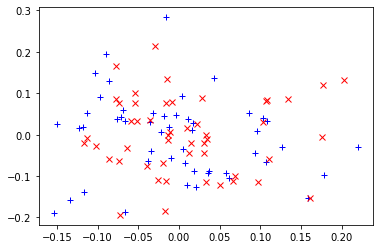

In [55]:
plt.figure(1)
plt.plot(noise15[:, 0], noise15[:, 1], '+b', label='Source samples')
plt.plot(noise95[:, 0], noise95[:, 1], 'xr', label='Target samples')

TypeError: Invalid shape (50,) for image data

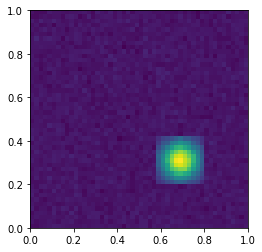

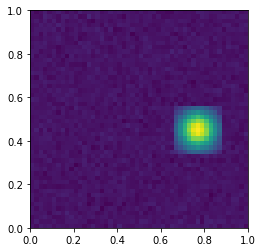

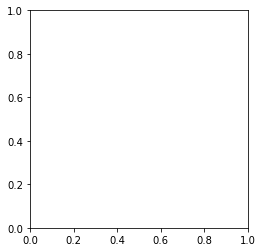

In [49]:
fig, ax = plt.subplots()
ax.imshow(noise15, extent=[0,1,0,1])
fig, ax = plt.subplots()
ax.imshow(noise95, extent=[0,1,0,1])

TypeError: Invalid shape (50,) for image data

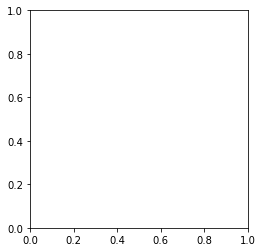

In [52]:
plt.imshow(grid)

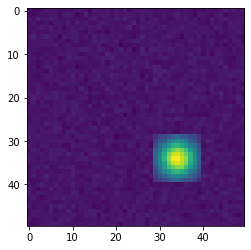

In [38]:
plt.imshow(noise15)

In [ ]:
ax.hist2d(y, x, bins=grid, weights=weights, cmap="hot_r")

In [ ]:
    
    
    
    

    

    K = torch.exp(- M / epsilon)

    #K = torch.from_numpy(K)